# importing the libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset

In [5]:
df=pd.read_csv('advertising.csv')

In [6]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [7]:
#shape of the dataset

In [8]:
df.shape

(200, 5)

In [9]:
df.describe()   #describing the data

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


# Missing values

In [11]:
df.isnull().sum()  

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [12]:
df=df.drop(columns=['Unnamed: 0'])

In [13]:
x=df.drop(columns=['Sales'])
y=df['Sales']

# Histogram

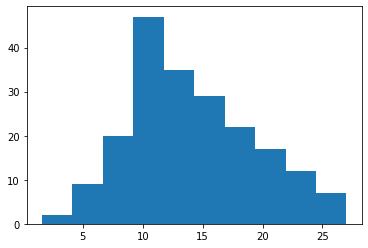

In [14]:
plt.hist(df['Sales'])
plt.show()

C:\Users\jyoth\OneDrive\Desktop\PSP\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


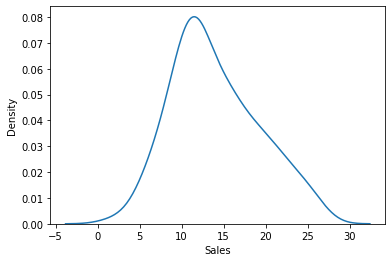

In [15]:
sns.distplot(df['Sales'],hist=False)
plt.show()

# Correlation

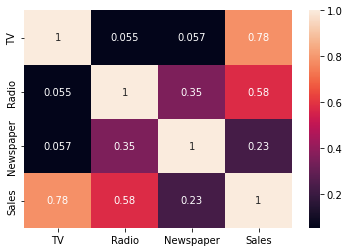

In [16]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

# Splitting the dataset

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [35]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Loading the model

In [36]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [58]:
from sklearn.linear_model import Ridge
model1=Ridge()

In [59]:
model1.fit(x_train,y_train)

Ridge()

# Prediction

In [41]:
y_pred=model.predict(x_test)
y_pred

array([21.70987127, 15.62025947,  5.46061803, 17.30226809, 18.19597756,
       24.16059817, 15.45600814, 12.13262415,  7.18119476, 16.646939  ,
       13.30403851,  7.98188555, 16.57096642, 15.88588847, 14.03592064,
       14.5656464 , 10.97925969, 16.60707801,  9.40637007, 17.49898152,
        7.39691029, 11.4382759 ,  6.71507712,  8.7000105 ,  9.76143282,
       13.9757909 ,  7.88003419, 19.10366233, 17.67826893, 16.48833526,
       21.57771759, 13.58279879, 15.43646268, 10.88682265, 19.71486991,
       14.37522536, 12.76478176,  8.23008989, 20.8375574 ,  5.20348178])

<AxesSubplot:xlabel='TV', ylabel='Sales'>

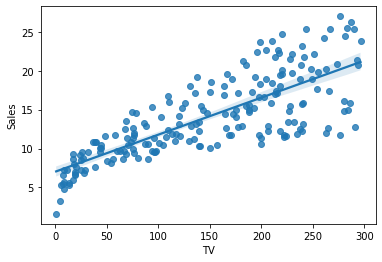

In [51]:
sns.regplot(x='TV',
           y='Sales',
            data=df
           )

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

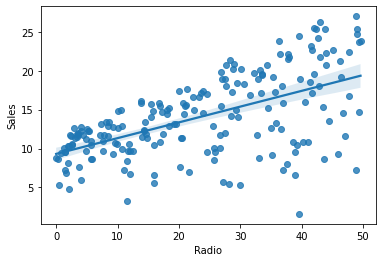

In [56]:
sns.regplot(x='Radio',
           y='Sales',
            data=df
           )

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

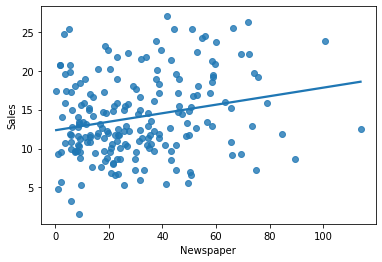

In [57]:
sns.regplot(x='Newspaper',
           y='Sales',
            ci=None,
            data=df
           )

# Performance metrics

In [48]:
from sklearn import metrics
R2=metrics.r2_score(y_test,y_pred)

In [49]:
R2

0.8071780050778691